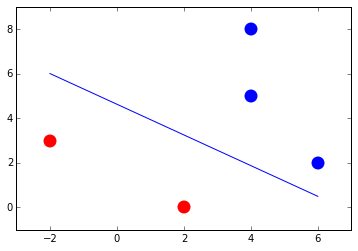

In [32]:
# Treinamento - Developers SP + AI Brasil - 09/06/2018

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

#Dados de Entrada - [Valores de X, Y e Bias]

X = np.array([
    [-2,3,-1],
    [2,0,-1],
    [4, 5, -1],
    [4, 8, -1],
    [6, 2, -1],
])

#Rótulos de saída associados 

y = np.array([-1,-1,-1,1,1,1])

#Cada um dos exemplos é então plotado em um gráfico 2D

for d, sample in enumerate(X):
    
    # Plotando  as amostras negativas com marcador vermelho
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='o', linewidths=2, color='red')
    
    # Plotando as amostras positivas com marcador azul
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='o', linewidths=2, color='blue')

#Plot do hiperplano para separação entre as duas classes. São escolhidos dois pontos e plotada uma linha os separando

plt.plot([-2,6],[6,0.5])

In [33]:
#Descida de gradiente, de forma estocástica, para aprender o hiperplano separado entre as duas classes

def svm_sgd_plot(X, Y):
    
    #Inicialização de nosso vetor de pesos SVM com zeros
    w = np.zeros(len(X[0]))
   
    #Taxa de Aprendizagem
    eta = 1
    
    #Número de épocas de treinamento
    epochs = 100000
   
    #Gravar classificações errôneas
    errors = []

    #Treinamento e Gradiente Descendente
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
        
            #Classificações Errôneas
            if (Y[i]*np.dot(X[i], w)) < 1:
                
                #Update de pesos de acordo com classificações errôneas
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                
                #Update de pesos de acordo com classificações corretas
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
    
    return w

In [34]:
w = svm_sgd_plot(X,y)

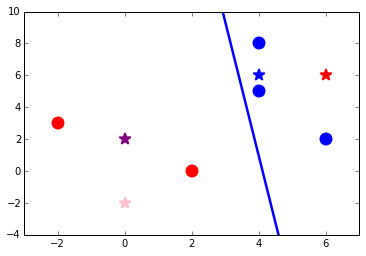

In [35]:
for d, sample in enumerate(X):
    # Plot das amostras negativas
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='o', linewidths=2, color='red')
   
    # Plot das amostras positivas
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='o', linewidths=2, color='blue')

# Adicionando amostras de teste
plt.scatter(0,-2, s=120, marker='*', linewidths=2, color='pink')
plt.scatter(0,2, s=120, marker='*', linewidths=2, color='purple')
plt.scatter(6,6, s=120, marker='*', linewidths=2, color='red')
plt.scatter(4,6, s=120, marker='*', linewidths=2, color='blue')

# Print do hiperplano calculado via svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')